# Exploratory Data Analysis using Python - Escape From Tarkov Analysis

*Analyzing 150 raids of my gameplay in Escape from Tarkov*

![](https://archive.esportsobserver.com/wp-content/uploads/2020/06/Twitch-Top10s-750x375.jpg)

### Introduction - What is Escape From Tarkov (EFT)?

"Escape from Tarkov is a hardcore and realistic online first-person action RPG/Simulator with MMO features and a story-driven walkthrough.

With each passing day the situation in the Norvinsk region grows more and more complicated. Incessant warfare in Tarkov has sparked massive panic; the local population has fled the city, but those who stayed are looking to improve their fortunes at the expense of others. Having accepted the new reality, savage Tarkov locals - <b>"Scavs"</b> flocked into well-armed gangs and started the redivision of the city. Nowadays, Tarkov is separated by unseen borders, controlled by different groups. Gain-greedy gunmen would go to any length to have their way, including the murder of civilians and direct confrontation with the two private military companies.

The players will have to experience living in the skin of one of the mercenaries who survived the initial stage of the Tarkov conflict. After choosing one of the sides – <b>USEC or BEAR</b> – the player’s character starts to make his way out of the city. Tarkov is sealed off by UN and Russian military, supply chains are cut, communication with operational command is lost, and in these conditions everyone has to make his own choices of what to do and how to get out of the chaos-ridden metropolis." https://www.escapefromtarkov.com/#about


### How and Why Did I Collect This Data?

I recently started playing Escape From Tarkov earlier this year and the most recent game patch 12.12 was released on December 12th, this is referred to as a wipe in the player community. When a wipe occurs, all player accounts and inventories are reset and EVERYONE starts back at level 1. You then select which side your private military contractor(PMC) or main character will be, I selected USEC this wipe just as I had previously. 

Your player's inventory, commonly referred to as your stash, holds all of the items you take out of a raid either as your PMC or your SCAV. Raids completed as a SCAV don't add experience to your main character but all the items and in game currency made from selling to traders or on the flea market can be used for your main character(PMC). The are other types of currencies used in game such as Euros and USD, but the primary currency are Rubles. Every raid is high risk and high reward, if you don't survive and exfiltrate from the raid you lose ALL of the items on your character, even your gear that you brought in.

I wanted to track my gameplay through 150 raids evenly between my PMC and SCAV to evaluate my play and do some exploratory data analysis utilizing Pandas and visualizations with matplotlib and seaborn. I initially tracked this data by hand using excel and after each raid as either a SCAV or PMC I would record my data for each variable field. Once completed I converted the excel file to a CSV format to upload into a Pandas dataframe. It should be noted that there are many other variables and data to in Escape from Tarkov, but these were the variables I chose to explore: raid number, map, experience gained from raid, time spent in raid in seconds, bodies looted, km traveled, pre-raid rubles, post-raid rubles, net rubles.

## Importing Jovian

In [23]:
!pip install jovian --upgrade --quiet

In [24]:
import jovian

In [135]:
# Execute this to save new versions of the notebook
jovian.commit(project="eft-analysis")
jovian.commit(files = ['eft.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aciorra83/eft-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aciorra83/eft-analysis


<IPython.core.display.Javascript object>

[jovian] Updating notebook "aciorra83/eft-analysis" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/aciorra83/eft-analysis


'https://jovian.ai/aciorra83/eft-analysis'

## Installing Libraries, Packages & Uploading Data

In [42]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# code line to render plots in notebook
%matplotlib inline 
import ast

In [43]:
# reading in the EFT data file to pandas df
eft_df = pd.read_csv('eft.csv')

In [44]:
# Setting Raid column as dataframe index
eft_df = eft_df.set_index('Raid')

In [45]:
eft_df

,Player_Type,Map,KIA,Raid_XP,Raid_Time_Sec,Bodies_Looted,KM_Traveled,Pre_Raid_Rubles,Post_Raid_Rubles,Net_Rubles
Raid,,,,,,,,,,
1,SCAV,Interchange,False,739,593,0,1.937,617079,814503,197424
2,PMC,Customs,True,1686,693,4,1.527,804992,804992,0
3,SCAV,Interchange,False,681,571,0,1.321,799444,877954,78510
4,PMC,Customs,False,4972,971,7,2.141,877954,922893,44939
5,SCAV,Interchange,False,595,275,0,0.778,922893,1057522,134629
...,...,...,...,...,...,...,...,...,...,...
146,SCAV,Interchange,False,761,440,0,1.172,1069028,1217153,148125
147,PMC,Shoreline,True,0,292,0,1.434,617155,617155,0
148,SCAV,Interchange,False,1016,464,1,1.384,517209,639393,122184


### Meta Data about etf_df

In [46]:
eft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player_Type       150 non-null    object 
 1   Map               150 non-null    object 
 2   KIA               150 non-null    bool   
 3   Raid_XP           150 non-null    int64  
 4   Raid_Time_Sec     150 non-null    int64  
 5   Bodies_Looted     150 non-null    int64  
 6   KM_Traveled       150 non-null    float64
 7   Pre_Raid_Rubles   150 non-null    int64  
 8   Post_Raid_Rubles  150 non-null    int64  
 9   Net_Rubles        150 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 11.9+ KB


In [47]:
eft_df.describe()

,Raid_XP,Raid_Time_Sec,Bodies_Looted,KM_Traveled,Pre_Raid_Rubles,Post_Raid_Rubles,Net_Rubles
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000
mean,1120.813333,618.453333,1.733333,1.611647,1.305676e+06,1.417324e+06,111647.826667
std,990.701022,376.472083,2.395932,0.921704,6.163588e+05,6.156741e+05,110393.082491
min,0.000000,12.000000,0.000000,0.104000,4.577600e+04,2.843370e+05,0.000000
25%,576.250000,425.250000,0.000000,1.025750,8.948718e+05,9.691898e+05,0.000000
50%,860.500000,571.000000,1.000000,1.544000,1.116088e+06,1.198068e+06,97197.500000
75%,1427.000000,737.250000,2.000000,2.012750,1.709351e+06,1.860724e+06,188387.750000
max,5606.000000,2600.000000,12.000000,6.252000,2.904362e+06,2.904362e+06,508895.000000


<b>After viewing some basic descriptive statistics for my eft_df these are some of my takeaways:<b/>
- Average raid experience points(xp): 1120
- Most xp gained in a raid: 5,606
- Least amount of time spent in raid: 12 seconds
- The average rubles profit from a raid: 111,647 and the most was 508,895
- The furthest my character traveled in a single raid: 6.252km 
- Average distance traveled per raid: 1.611km 

## Querying and Sorting Data
This data frame is great for overall analysis but I'm also interested in discovering trends solely PMC and SCAV raids so I'll seperate that data into their own subsets. 

In [48]:
PMC = eft_df['Player_Type'] == 'PMC'

In [49]:
# Subset of PMC raids
eft_df[PMC].head(10) # just printing the first 10 values to save space

,Player_Type,Map,KIA,Raid_XP,Raid_Time_Sec,Bodies_Looted,KM_Traveled,Pre_Raid_Rubles,Post_Raid_Rubles,Net_Rubles
Raid,,,,,,,,,,
2,PMC,Customs,True,1686,693,4,1.527,804992,804992,0
4,PMC,Customs,False,4972,971,7,2.141,877954,922893,44939
6,PMC,Customs,True,5,443,0,1.044,1039421,1039421,0
8,PMC,Reserve,True,526,426,0,1.023,1132942,1153162,20220
10,PMC,Shoreline,False,432,502,0,2.221,1403239,1403239,0
12,PMC,Reserve,False,1374,567,1,1.416,1553471,1563826,10355
14,PMC,Customs,False,2437,927,2,2.042,1060761,1068396,7635
16,PMC,Customs,False,1103,598,0,1.656,894401,978513,84112
18,PMC,Woods,True,0,209,0,0.868,1052477,1052477,0


In [50]:
SCAV = eft_df['Player_Type'] == 'SCAV'

In [51]:
# Subset of SCAV raids
eft_df[SCAV].head(10) # just printing the first 10 values to save space

,Player_Type,Map,KIA,Raid_XP,Raid_Time_Sec,Bodies_Looted,KM_Traveled,Pre_Raid_Rubles,Post_Raid_Rubles,Net_Rubles
Raid,,,,,,,,,,
1,SCAV,Interchange,False,739,593,0,1.937,617079,814503,197424
3,SCAV,Interchange,False,681,571,0,1.321,799444,877954,78510
5,SCAV,Interchange,False,595,275,0,0.778,922893,1057522,134629
7,SCAV,Interchange,False,685,538,0,1.224,1039421,1184022,144601
9,SCAV,Interchange,False,574,519,0,1.562,1270484,1418416,147932
11,SCAV,Interchange,False,718,468,0,1.546,1433614,1555163,121549
13,SCAV,Interchange,False,820,658,1,1.946,1595401,1717466,122065
15,SCAV,Interchange,False,817,551,0,1.695,1061998,1164765,102767
17,SCAV,Interchange,False,608,442,0,1.438,1028513,1197439,168926


## Analyzing Subsets
Now that two subsets of just SCAV and PMC raids have been created I'll compare the two firstly by examining how many values are in each using Pandas shape method, which will return a tuple containing the number of rows and columns respectively.

In [52]:
eft_df[SCAV].shape

(75, 10)

In [53]:
eft_df[PMC].shape

(75, 10)

Both subsets contain 75 rows and 11 columns, meaning that I conducted 75 Raids as a SCAV and 75 Raids as a PMC.

Let's examine the raid count for the different maps for both SCAV and PMC raids using the .value_counts() method.

In [54]:
# SCAV map breakdown
eft_df[SCAV]['Map'].value_counts()

Interchange    52
Reserve        23
Name: Map, dtype: int64

In [55]:
# PMC map breakdown
eft_df[PMC]['Map'].value_counts()

Customs        24
Shoreline      21
Factory        13
Interchange     8
Reserve         4
Lighthouse      3
Woods           2
Name: Map, dtype: int64

I really like to run my SCAV on Interchange and the data definitely reflects that, of the two maps that I would go to as a SCAV I ran Interchange 52 times! From the youtubers that I follow for game guides I think that Interchange is the most profitable map, I have always thought that my SCAV raids were more profitable than my PMC but know I have some data to find out once and for all.

## Examing Overall and Player Type Survival Rates

In [81]:
# Overall survival 
eft_df.KIA.value_counts()

False    99
True     51
Name: KIA, dtype: int64

In [91]:
# Survival rate is equal to false values count / total
overall_survival = 99/150
print('My overall survival rate was ' + '{:.0%}'.format(overall_survival))

My overall survival rate was 66%


In [79]:
# Examing # of KIA False values (ie: did not die in raid)
eft_df[PMC].KIA.value_counts()

True     40
False    35
Name: KIA, dtype: int64

In [95]:
# Survival rate is equal to false values count / total
pmc_survival = pmc_survival = 35/75
print('My PMC survival rate was ' + '{:.0%}'.format(pmc_survival))

My PMC survival rate was 47%


In [80]:
# Examing # of KIA False values (ie: did not die in raid)
eft_df[SCAV].KIA.value_counts()

False    64
True     11
Name: KIA, dtype: int64

In [94]:
# Survival rate is equal to false values count / total
scav_survival = scav_survival = 64/75
print('My SCAV survival rate was ' + '{:.0%}'.format(scav_survival))

My SCAV survival rate was 85%


## Did my SCAV or PMC prove to be the most profitable character overall?

In [57]:
# Net Rubles as SCAV
scav_profit = eft_df[SCAV]['Net_Rubles'].sum()

In [58]:
# Net Rubles as PMC
pmc_profit = eft_df[PMC]['Net_Rubles'].sum()

In [59]:
print(f'My SCAV made {scav_profit} which was ' + str(scav_profit - pmc_profit) + ' more Rubles than my PMC overall!!')

My SCAV made 12049563 which was 7351952 more Rubles than my PMC overall!!


It looks like my hunch was correct! a 7,351,952 Ruble difference between my SCAV and PMC, I had no idea difference was that much.

## Time in Raid and KM Traveled

In [60]:
# Increase the plot size
sns.set(rc = {'figure.figsize':(15,9)})

In [61]:
# Configuring Styles : the original darkgrid facecolor was too transparent. axes.facecolor adjusted the darkness of the background grid
sns.set_style('darkgrid', {"axes.facecolor": ".8"})


I'm interested in examining some variables in their relation to one another, in this subsequent scatterplot I'll investigate time spent in raid in seconds and the km traveled by my character. I have two questions that I hope to answer from this visualization.

### Question: Which player type had the longest raid in terms of time spent in raid?

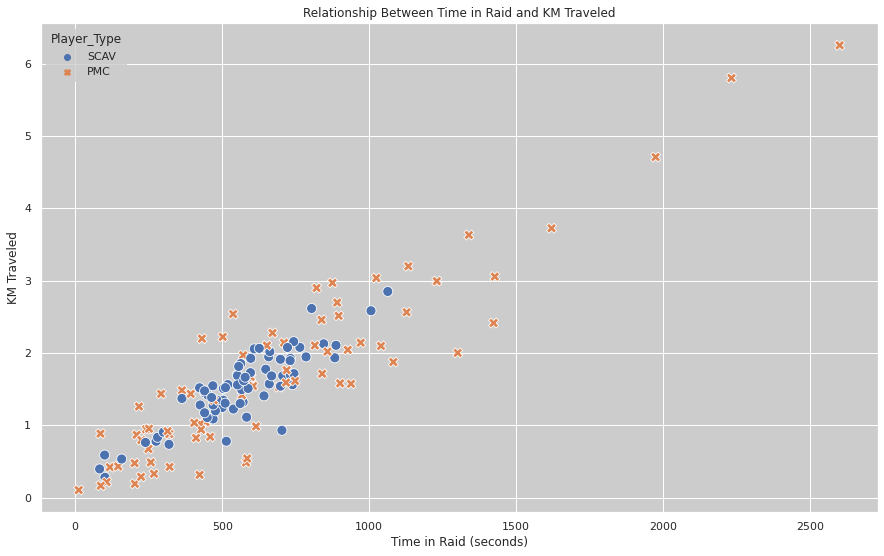

In [62]:
# Scatterplot of time in raid compared to KM traveled
sns.scatterplot(data = eft_df,
                x = 'Raid_Time_Sec', # x axis
                y = 'KM_Traveled',   # y axis
                hue = 'Player_Type', # legend
                style = 'Player_Type',
                s = 100)

# Plot title and labels
plt.title('Relationship Between Time in Raid and KM Traveled')
plt.xlabel('Time in Raid (seconds)')
plt.ylabel('KM Traveled');

With approximately 26000 seconds spent in raid as a PMC we have our answer to the first question. There appears to be a strong positive correlational value between time spent in raid and distance traveled, meaning as one variable x increases so will variable y. 

### Question: What type of relationship is there between time spent in raid and km traveled?

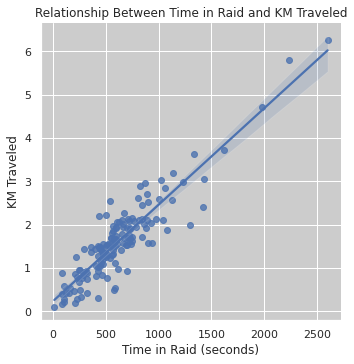

In [63]:
# adding a line of best fit
sns.lmplot(x='Raid_Time_Sec', y='KM_Traveled', data = eft_df)

# Plot title and labels
plt.title('Relationship Between Time in Raid and KM Traveled')
plt.xlabel('Time in Raid (seconds)')
plt.ylabel('KM Traveled');

In [64]:
# Calculating r value
stats.spearmanr(eft_df['Raid_Time_Sec'], eft_df['KM_Traveled'])

SpearmanrResult(correlation=0.8574665581097238, pvalue=1.4853109360625655e-44)

After adding a line of best fit and calculating the Pearson correlation coefficient I can conclude that there is a very strong positive relationship containing a correlation equal to <b>0.85</b> meaning that there is a positive relationship between the time spent in raid and km traveled while in raid. 

### Question: What type of relationship is there between time spent in raid and km traveled?

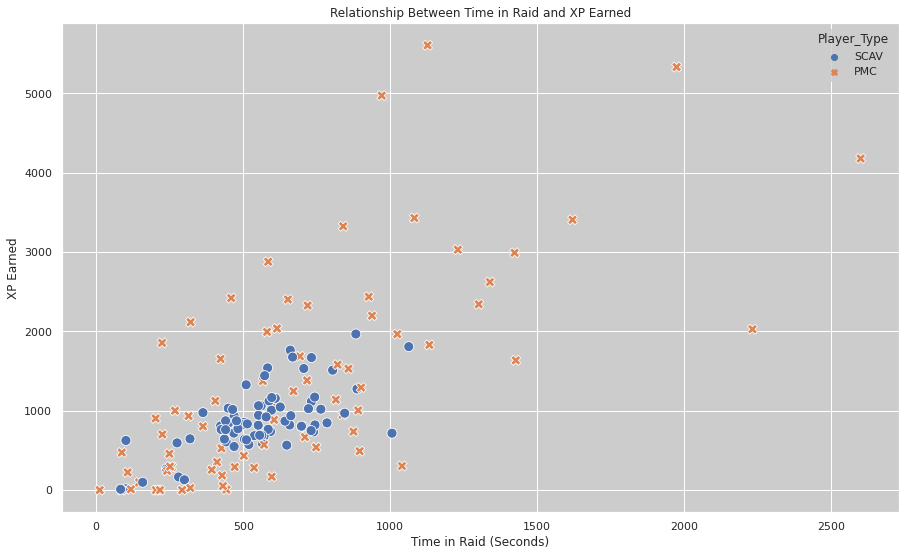

In [102]:
# Scatterplot # of bodies looted and xp gained
sns.scatterplot(data = eft_df,
                x = 'Raid_Time_Sec', # x axis
                y = 'Raid_XP',   # y axis
                hue = 'Player_Type',
                style = 'Player_Type',
                s = 100)

plt.title('Relationship Between Time in Raid and XP Earned')
plt.xlabel('Time in Raid (Seconds)')
plt.ylabel('XP Earned');

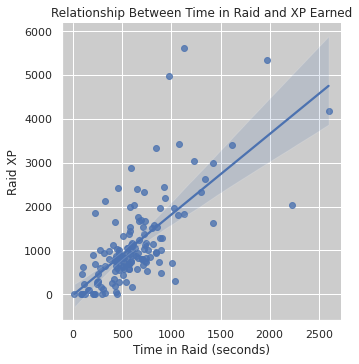

In [101]:
# adding a line of best fit
sns.lmplot(x='Raid_Time_Sec', y='Raid_XP', data = eft_df)

# Plot title and labels
plt.title('Relationship Between Time in Raid and XP Earned')
plt.xlabel('Time in Raid (seconds)')
plt.ylabel('Raid XP');

In [99]:
# Calculating r value
stats.spearmanr(eft_df['Raid_Time_Sec'], eft_df['Raid_XP'])

SpearmanrResult(correlation=0.6685252024779391, pvalue=8.982722031155184e-21)

### Interpreting the Results
It appears that there is a positive relationship between time spent in raid and the amount of XP earned. Moving forward in this wipe I should try to spend more time in raid if I want to gain more experience points. 

## Does Pre-Raid Ruble Amount Influence Raid Time?
I have a feeling that when I have a lower amount of Rubles in my stash I spend more time in raid. Whether it be trying to collect more loot or hunting down enemy players, and less time with more in my stash. 

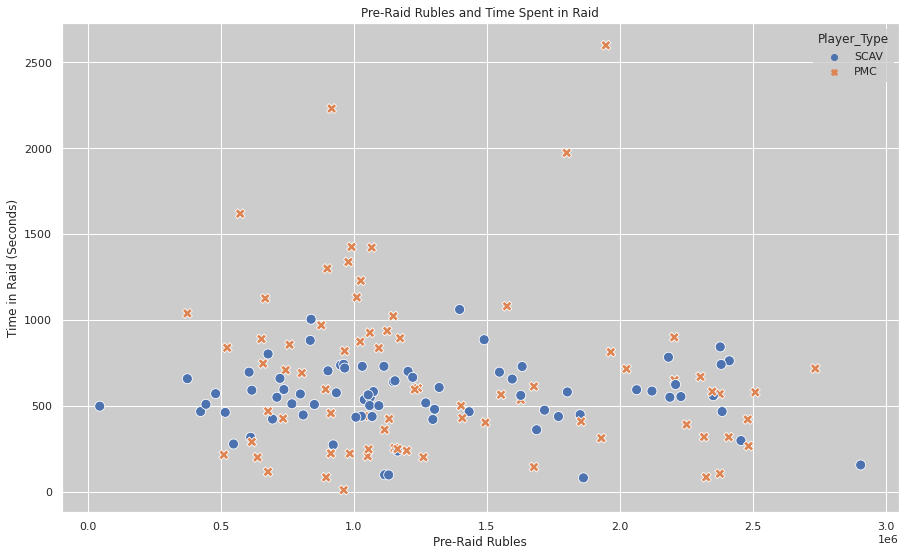

In [134]:
# Scatterplot of pre-raid rubles compared to time in raid
sns.scatterplot(data = eft_df,
                x = 'Pre_Raid_Rubles', # x axis
                y = 'Raid_Time_Sec',   # y axis
                hue = 'Player_Type',
                style = 'Player_Type',
                s = 100)

plt.title('Pre-Raid Rubles and Time Spent in Raid')
plt.xlabel('Pre-Raid Rubles')
plt.ylabel('Time in Raid (Seconds)');

At first glance, this plot does not indicate the relationship that I thought it would. I want to explore further and examine other aspects such as a line of fit and the r value like I've done with other scatterplots in this analysis.

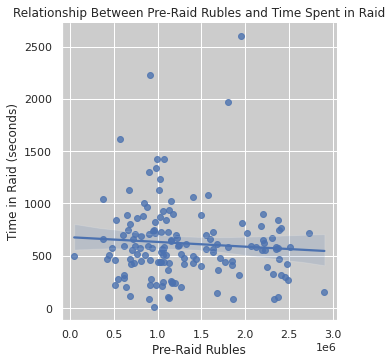

In [132]:
# adding a line of best fit
sns.lmplot(x='Pre_Raid_Rubles', y='Raid_Time_Sec', data = eft_df)

# Plot title and labels
plt.title('Relationship Between Pre-Raid Rubles and Time Spent in Raid')
plt.xlabel('Pre-Raid Rubles')
plt.ylabel('Time in Raid (seconds)');

In [133]:
stats.spearmanr(eft_df['Pre_Raid_Rubles'], eft_df['Raid_Time_Sec'])

SpearmanrResult(correlation=-0.09441379071253435, pvalue=0.250463637781662)

Based on the r value of -0.094 and the nearly horizontal line of fit, I know for certain that these two variables have little to no correlation. 

## SCAV & PMC XP

I'm interested in viewing the range of XP gained in Raid for both my SCAV and PMC player types to determine which player type earned more XP in a raid? A histogram will help to visualize different ranges of XP and along with the number of raids completed within that xp range.

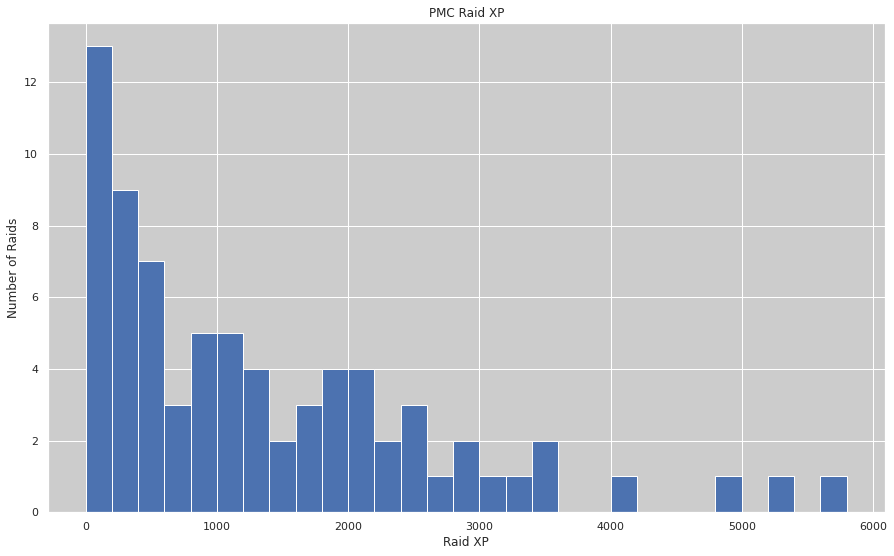

In [65]:
# Histogram of PMC raid xp
plt.title('PMC Raid XP')
plt.xlabel('Raid XP')
plt.ylabel('Number of Raids')
plt.hist(eft_df[PMC].Raid_XP, bins=np.arange(0,6000,200));

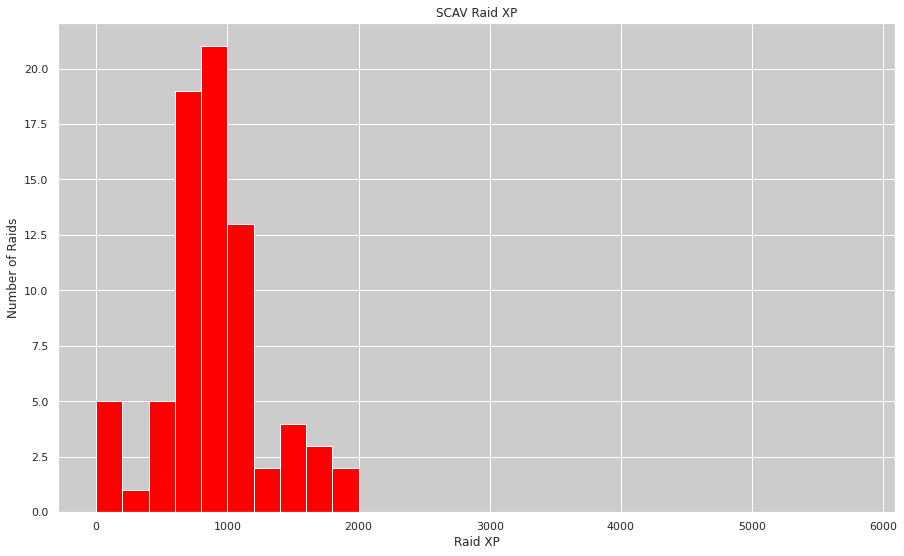

In [66]:
# Histogram of SCAV raid xp
plt.title('SCAV Raid XP')
plt.xlabel('Raid XP')
plt.ylabel('Number of Raids')
plt.hist(eft_df[SCAV].Raid_XP, bins=np.arange(0,6000,200), color='red');

It appears that although my PMC conducted 13 raids and only earned between 0 and 200 xp, that character typed earned the most xp in a single raid with over 5,600xp. Conversely, my SCAV player type had less raids within the 0 to 200 xp range buy did not earn more than 2000 xp for any raids conducted. While my SCAV may earn more Rubles, these histograms clearly demonstrate that my PMC has the potential to earn more xp in a raid. I believe that this is a result of my PMC character looting more bodies and there is a relationship between the number of bodies looted and xp gained in a raid, but let's examine the data to find out!

### Question: What is the relationship between bodies looted and xp earned?

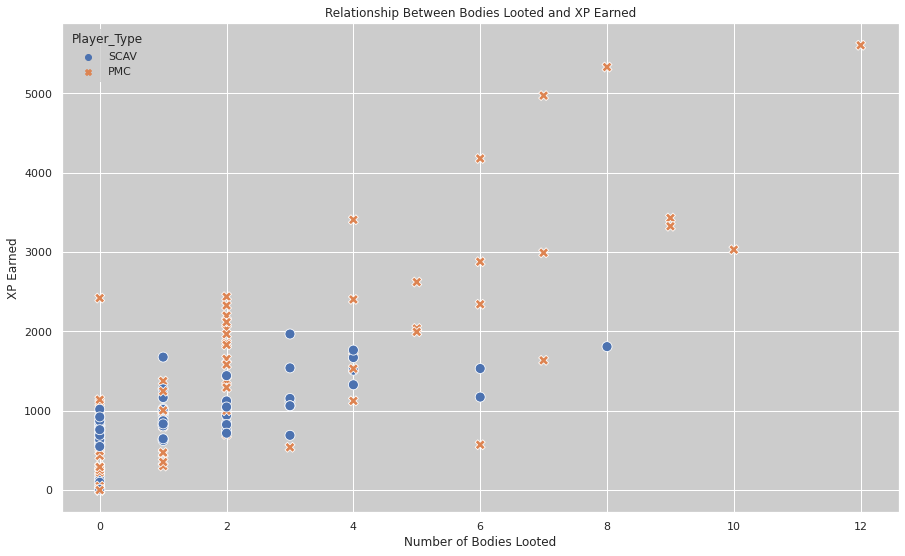

In [67]:
# Scatterplot # of bodies looted and xp gained
sns.scatterplot(data = eft_df,
                x = 'Bodies_Looted', # x axis
                y = 'Raid_XP',   # y axis
                hue = 'Player_Type',
                style = 'Player_Type',
                s = 100)

plt.title('Relationship Between Bodies Looted and XP Earned')
plt.xlabel('Number of Bodies Looted')
plt.ylabel('XP Earned');

It appears that there may be a relationship between the variables for my PMC player type but not for my SCAV, let's isolate by player type and determine if there is any correlation. 

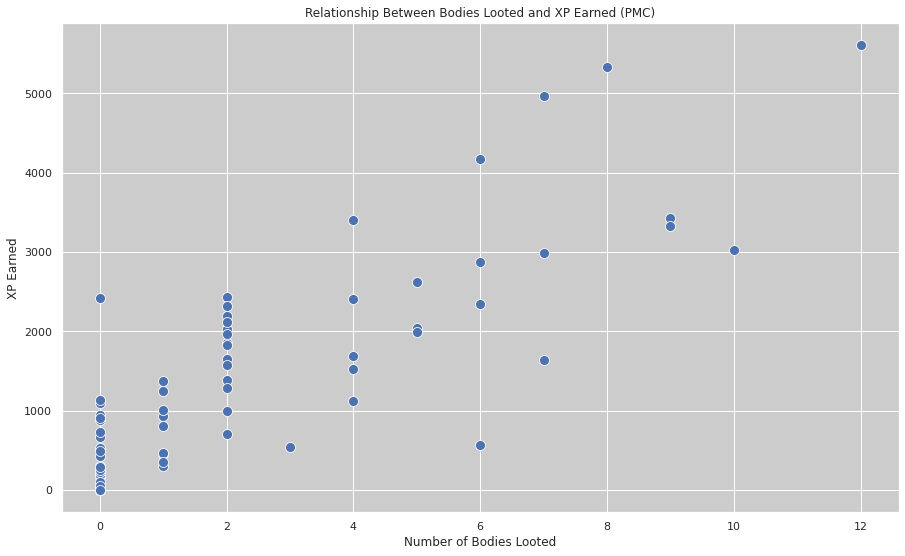

In [68]:
# correlational analysis of PMC bodies looted to xp
sns.scatterplot(data = eft_df[PMC],
                x = 'Bodies_Looted', # x axis
                y = 'Raid_XP',   # y axis
                s = 100)

plt.title('Relationship Between Bodies Looted and XP Earned (PMC)')
plt.xlabel('Number of Bodies Looted')
plt.ylabel('XP Earned');

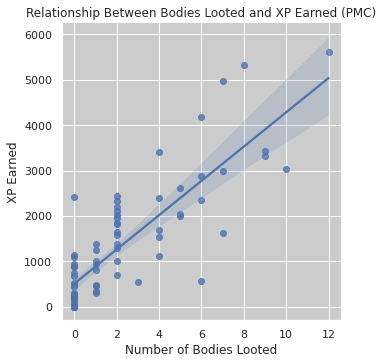

In [69]:
# adding a line of best fit
sns.lmplot(x='Bodies_Looted', y='Raid_XP', data = eft_df[PMC])

plt.title('Relationship Between Bodies Looted and XP Earned (PMC)')
plt.xlabel('Number of Bodies Looted')
plt.ylabel('XP Earned');

In [70]:
# Calculating correlation coefficient
stats.spearmanr(eft_df[PMC]['Bodies_Looted'], eft_df[PMC]['Raid_XP'])

SpearmanrResult(correlation=0.8240881173928623, pvalue=1.0753960663241467e-19)

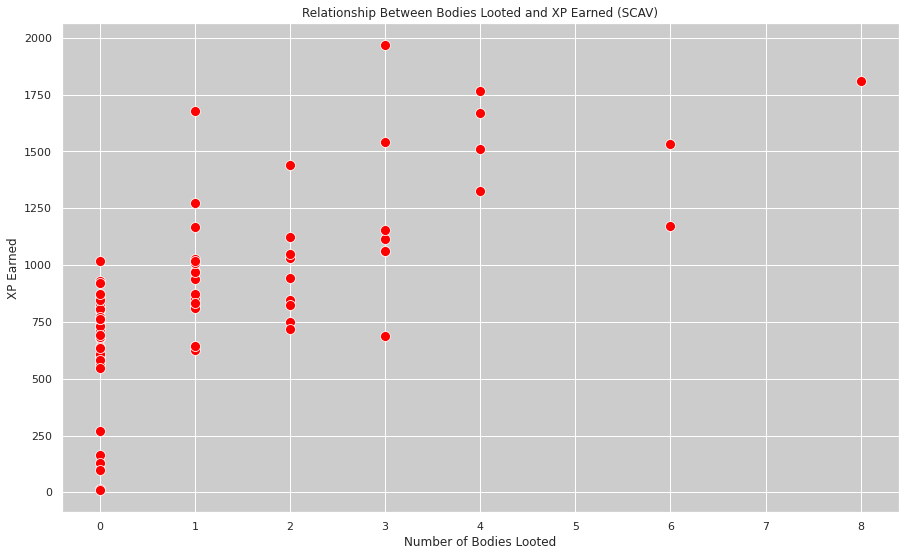

In [71]:
# correlational analysis of SCAV bodies looted to xp
sns.scatterplot(data = eft_df[SCAV],
                x = 'Bodies_Looted', # x axis
                y = 'Raid_XP',   # y axis
                color = 'red',
                s = 100)

plt.title('Relationship Between Bodies Looted and XP Earned (SCAV)')
plt.xlabel('Number of Bodies Looted')
plt.ylabel('XP Earned');

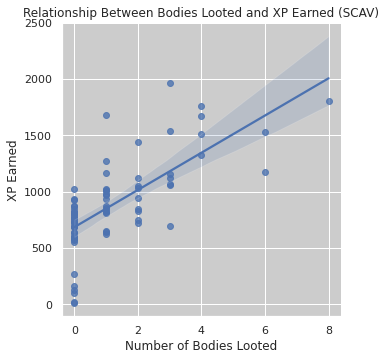

In [72]:
# adding a line of best fit
sns.lmplot(x='Bodies_Looted', y='Raid_XP', data = eft_df[SCAV])

plt.title('Relationship Between Bodies Looted and XP Earned (SCAV)')
plt.xlabel('Number of Bodies Looted')
plt.ylabel('XP Earned');

In [73]:
# Calculating correlation coefficient 
stats.spearmanr(eft_df[SCAV]['Bodies_Looted'], eft_df[SCAV]['Raid_XP'])

SpearmanrResult(correlation=0.7243016810121963, pvalue=2.070137360670292e-13)

### Analyzing Correlation Coefficients
The strength of the relationship between the number of bodies looted and XP gained for my PMC and SCAV were <b>0.82 and 0.72</b> respectively. Indicating that for my PMC character, there is a stronger correlation between the number of bodies looted and XP gained from a raid. I know that the play style of both player types is very different, as a SCAV I solemnly killed NPC's or other players. However, as a PMC the mentality is to shoot on sight everyone is your enemy unless you're playing in a squad. Within the data collected, there are no metrics tracking in raid kills which your character does earn XP for, after a kill it's common that players will loot the body.


## Net Rubles by Map

Let's examine data about net Rubles by map for both the PMC and SCAV player types

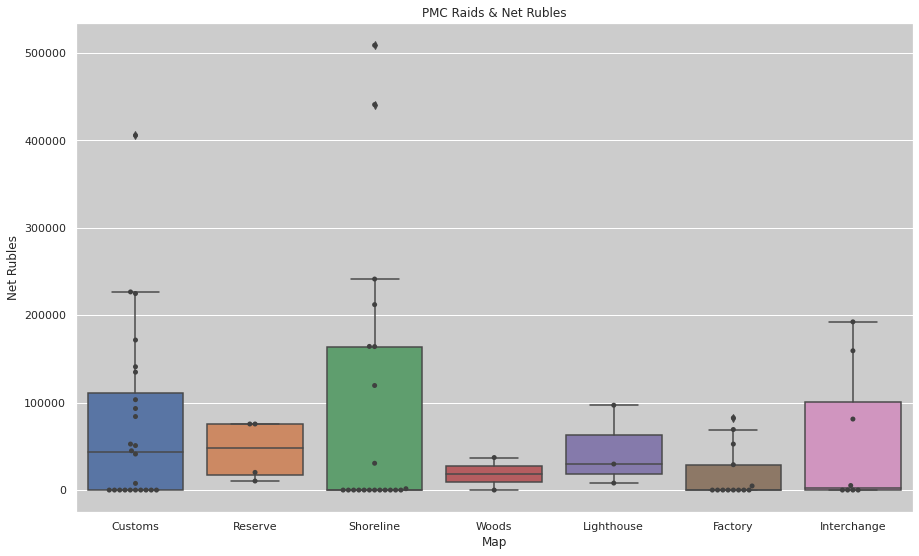

In [74]:
# boxplot for PMC net rubles by map
sns.boxplot(x="Map", y ="Net_Rubles", data = eft_df[PMC])
sns.swarmplot(x="Map", y ="Net_Rubles", data = eft_df[PMC], color='.25');

plt.title('PMC Raids & Net Rubles')
plt.xlabel('Map')
plt.ylabel('Net Rubles');

As noted earlier, I used my PMC character on a wider variety of maps comparatively to my SCAV. Examining the data from the above box plots I noticed that my PMC rarely earned over 100,000 Rubles. Earlier in my analysis I discovered that my SCAV earned 7,351,952 Rubles more in profits.

### Question: Which map as a SCAV was best in terms of net Rubles?
There are many more data points for the maps Interchange and Reserve from my raids as a SCAV player. It is important to note that there are more data points for Interchange than Reserve, but both of these maps have the most data currently. Data point values have been plotted with the swarmplot method to illustrate the difference in available data points. 

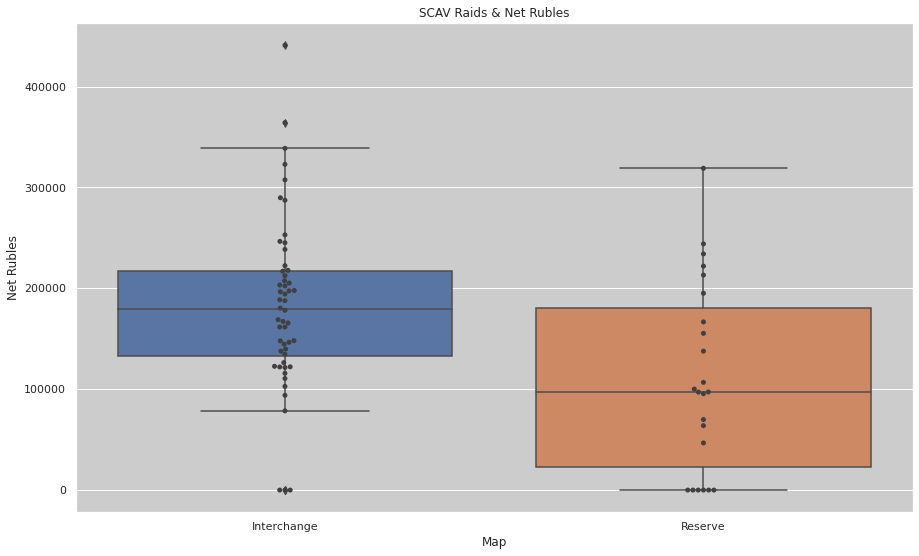

In [75]:
# boxplot for SCAV net rubles by map
sns.boxplot(x="Map", y ="Net_Rubles", data = eft_df[SCAV])
sns.swarmplot(x="Map", y ="Net_Rubles", data = eft_df[SCAV], color='.25');

plt.title('SCAV Raids & Net Rubles')
plt.xlabel('Map')
plt.ylabel('Net Rubles');

### Analyzing Box Plots
This plot illustrates that of the two maps I utilized as a SCAV player, Interchange was the best map in terms of net Rubles. The median profit earned from Interchange appears to be around 175,000 while the median profit for Reserve appears to be just under 100,000 Rubles. This finding reinforces my initial belief that Interchange is the best map to run as a SCAV in order to maximize profits. However, to be absolutely certain I would like to have an equal number of samples for both maps. 

## Inferences and Conclusion

- My SCAV earned 12,049,563 Rubles which was 7,351,952 more Rubles than my PMC.
- The longest time spent in raid was with my PMC with approximately 2600 seconds or 43 minutes. I tend to spend more time in raid while playing as my PMC character.
- The relationship between time spent in raid and km traveled appeared positive with a value of 0.85, my PMC character has traveled the furthest distances in game. 
- The number of bodies looted and XP gained from a raid is more strongly correlated with my PMC character. However, I believe this is due to a spurious variable. When I play as a PMC I'm combating against enemy players and NPC's so it's shoot on sight, whereas SCAV players rarely engage in combat and my playstyle as a SCAV is to solely collect loot. The in game kills as a PMC are always looted, but I believe the additional XP from the kill as a PMC affected this correlation and made it appear stronger.
- Although I only utilized two maps as a SCAV for these 150 raids, Interchange proved to be the best in terms of making a profit. The median net rubles from a raid on Interchange were approximately 175,000 compared to the median profit of 100,000 Rubles from Reserve.
- The amount of Rubles that I have in my stash before I enter a raid has no correlation to the amount of time I spend in that raid. 
- The more time I do spend in raid, specifically as a PMC player type, I tend to earn more XP. In future raids I should strive to stay in raid longer if I want to level up my PMC more quickly. 


## References and Future Works
To continue this work or next steps I would consider adding to this current data set. Other important considerations are tracking this same data prior to unlocking the player flea market. This would change the net rubles but I would be interested in exploring that data to determine if Interchange is still the most profitable map as a SCAV player. In future works I'd like to work on machine learning models to predict outcomes of future raids and gameplay.
- Seaborn Documentation https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Scipy Documentation Spearman Correlation Coefficient https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr
- Matplotlib Documentation https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- Escape From Tarkov Website https://www.escapefromtarkov.com/